# Time series EDA

Learn more about visulizing time series data [here](https://ds.codeup.com/timeseries/explore/)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import prepare

import warnings
warnings.filterwarnings('ignore')


## Store items

In [3]:
store = prepare.get_store_item_sales_clean()
store.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,month_name,weekday,weekday_name,day,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,January,1,Tuesday,1,10.92
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,January,2,Wednesday,2,9.24
2013-01-03,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,January,3,Thursday,3,11.76
2013-01-04,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,January,4,Friday,4,10.92
2013-01-05,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,January,5,Saturday,5,8.40


**Split data**

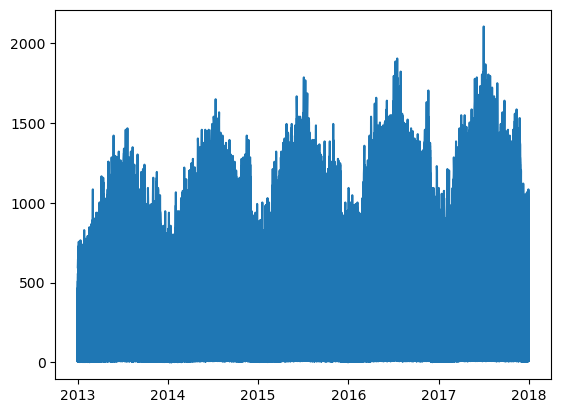

In [4]:
plt.plot(store.index, store.sales_total)

Use human based seasonal pliting methose because I see seasonality in the data.

In [5]:
# split data
train = store.loc[:'2015'] # includes 2016
validate = store.loc['2016']
test = store.loc['2017']

train.shape, validate.shape, test.shape

((547500, 19), (183000, 19), (182500, 19))

**Visualize different time periods**

<Axes: ylabel='Frequency'>

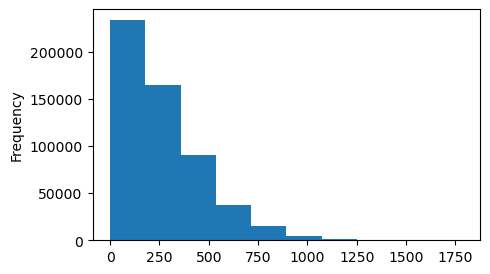

In [6]:
plt.figure(figsize=(5,3))
train.sales_total.plot.hist()

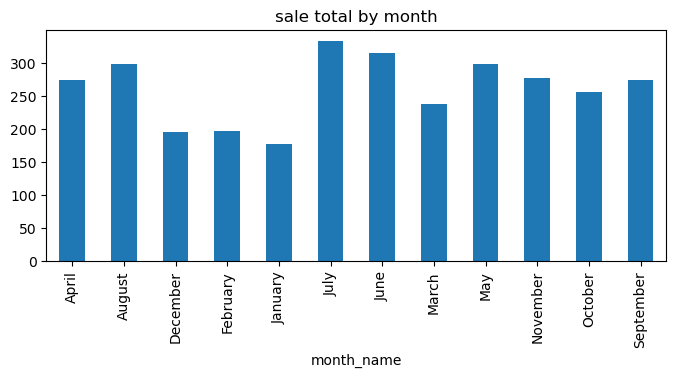

In [7]:
# plot sample in month
sale_sample = train.groupby("month_name").mean()

plt.figure(figsize=(8,3))
sale_sample.sales_total.plot.bar()
plt.title("sale total by month")
plt.show()

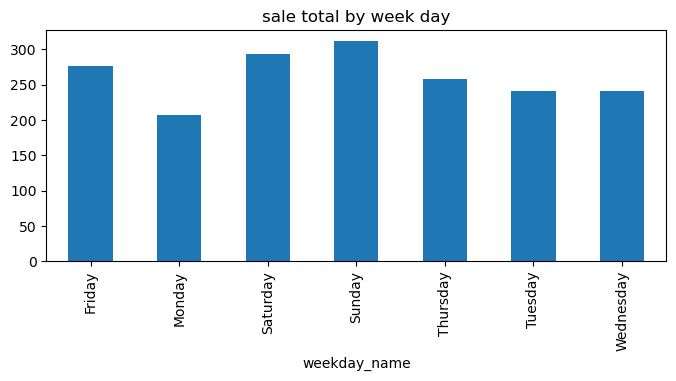

In [8]:
# plot sample in weekday
sale_sample = train.groupby("weekday_name").mean()

plt.figure(figsize=(8,3))
sale_sample.sales_total.plot.bar()
plt.title("sale total by week day")
plt.show()

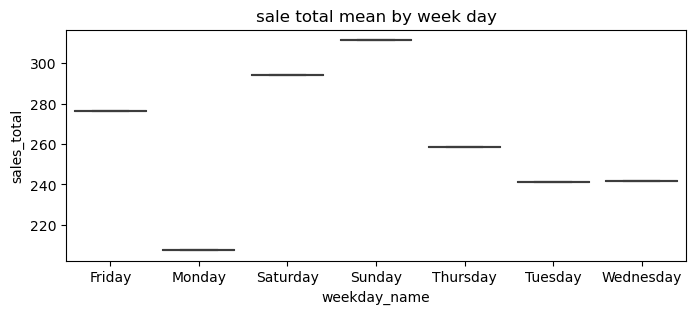

In [9]:
# plot sample in weekday
sale_sample = train.groupby("weekday_name").mean()

plt.figure(figsize=(8,3))
sns.boxplot(y=sale_sample.sales_total, x=sale_sample.index)
plt.title("sale total mean by week day")
plt.show()

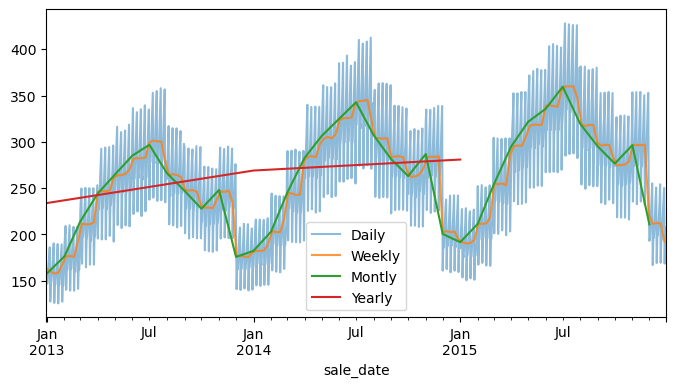

In [10]:
# plot different time line of sale total
y = train.sales_total

plt.figure(figsize=(8,4))
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

**Seasonal plot**

<Axes: title={'center': 'Seasonal Plot'}, xlabel='sale_date'>

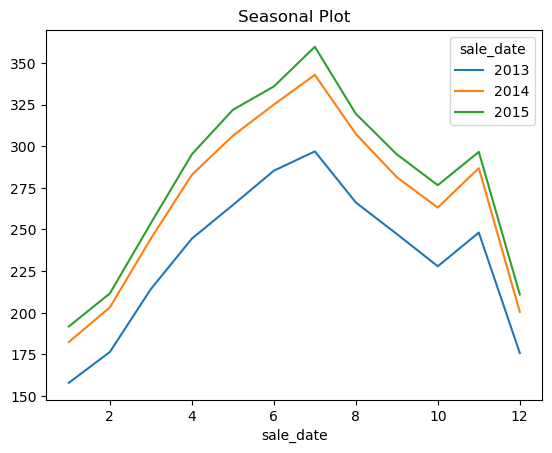

In [11]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


**seasonal subplot**

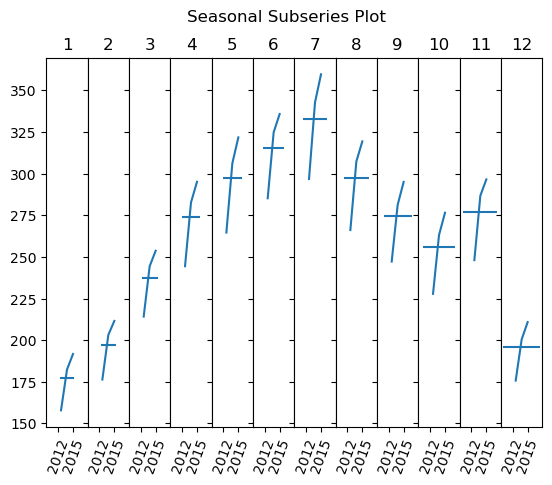

In [12]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack(0)

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iterrows()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    ax.set_xticklabels([int(thing) for thing in ax.get_xticks()], rotation = 70)

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)


**Autocorrelation plot below** is a measure of the linear relationship between lagged values of a time series. An autocorrelation plot shows the correlation coefficient as a function of lag time.

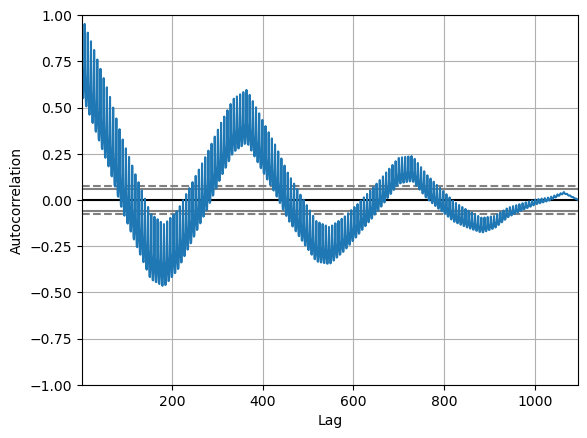

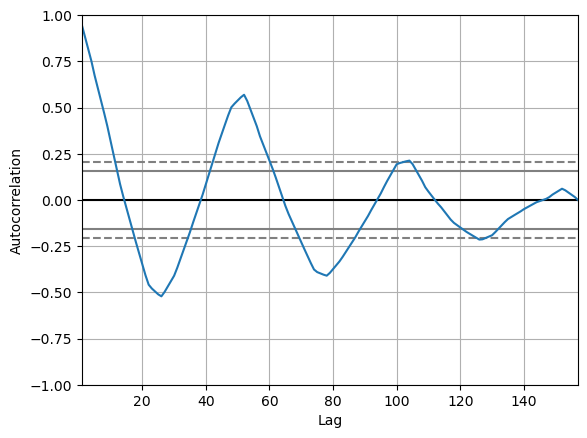

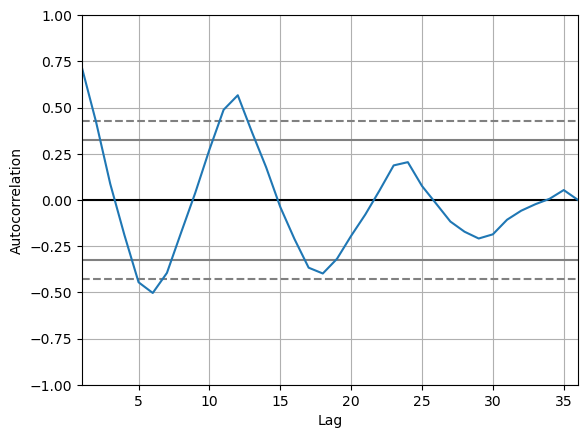

In [13]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('D').mean())
plt.show()
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())
plt.show()
pd.plotting.autocorrelation_plot(train.sales_total.resample('m').mean())
plt.show()


The lagged value is the data point that occurred at a certain number of time periods before the current data point. In other words, it's the value of the time series "lagged" or shifted backward in time.

## OPSD data

In [14]:
opsd = prepare.get_ops_clean()
opsd.head()

,Consumption,Wind,Solar,Wind+Solar,year,month,month_name
Date,,,,,,,
2006-01-01,1069.184,164.814173,89.258695,272.663481,2006,1,January
2006-01-02,1380.521,164.814173,89.258695,272.663481,2006,1,January
2006-01-03,1442.533,164.814173,89.258695,272.663481,2006,1,January
2006-01-04,1457.217,164.814173,89.258695,272.663481,2006,1,January
2006-01-05,1477.131,164.814173,89.258695,272.663481,2006,1,January


**Split data**

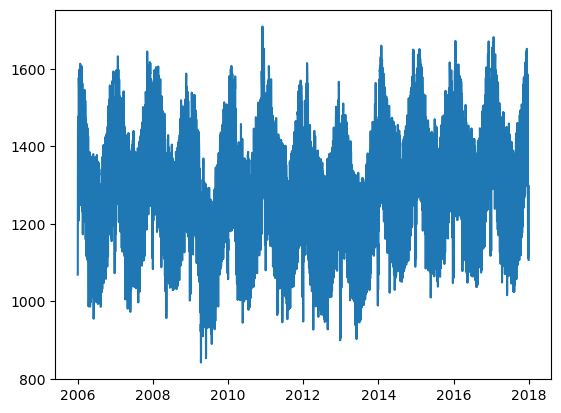

In [17]:
plt.plot(opsd.index, opsd.Consumption)

Use percentage based pliting methose to see how it works.

In [21]:
import math

train_size = .7
val_size = .2

train_end_index = math.ceil(train_size * opsd.shape[0])
validate_end_index = math.ceil(train_end_index + (val_size * opsd.shape[0]))


train = opsd[:train_end_index] # everything up (not including) to the test_start_index
validate = opsd[train_end_index:validate_end_index]
test = opsd[validate_end_index:] # everything from the test_start_index to the end

train.shape, validate.shape, test.shape

((3069, 7), (877, 7), (437, 7))

**Visualize different time periods**

<Axes: ylabel='Frequency'>

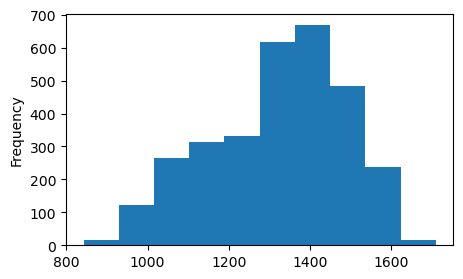

In [23]:
plt.figure(figsize=(5,3))
train.Consumption.plot.hist()

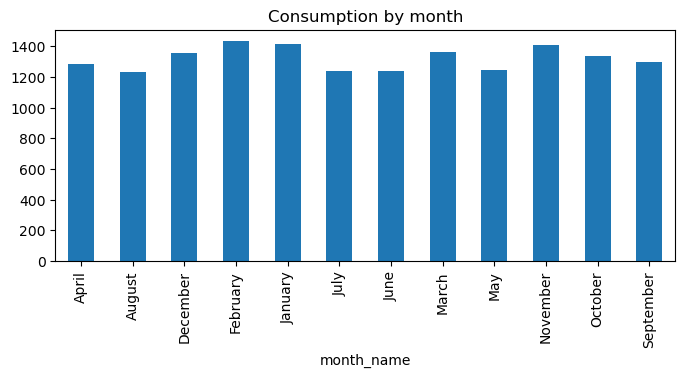

In [25]:
# plot sample in month
consumption_sample = train.groupby("month_name").mean()

plt.figure(figsize=(8,3))
consumption_sample.Consumption.plot.bar()
plt.title("Consumption by month")
plt.show()

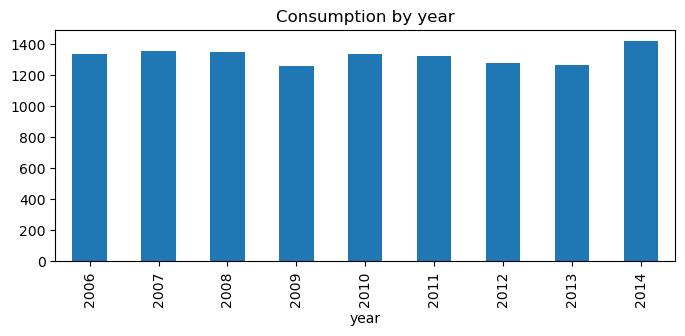

In [26]:
# plot sample in month
consumption_sample = train.groupby("year").mean()

plt.figure(figsize=(8,3))
consumption_sample.Consumption.plot.bar()
plt.title("Consumption by year")
plt.show()

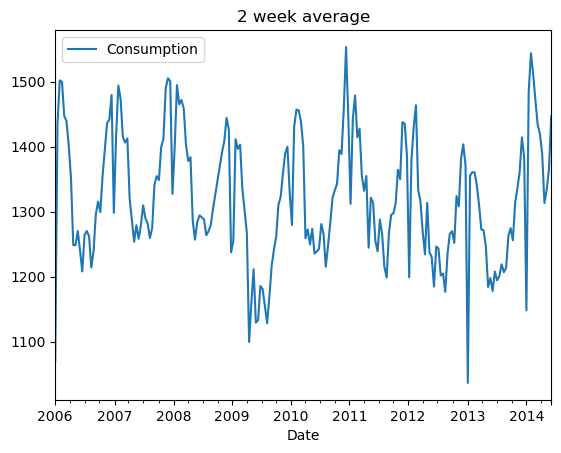

In [30]:
y = train.Consumption

y.resample('2W').mean().plot(title='2 week average')
plt.legend()


<Axes: title={'center': 'Average week-to-week change in Consumption'}, xlabel='Date'>

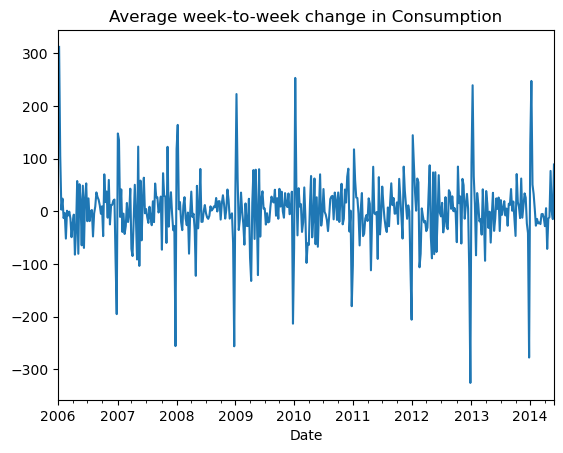

In [32]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in Consumption')


<Axes: title={'center': 'Seasonal Plot'}, xlabel='Date'>

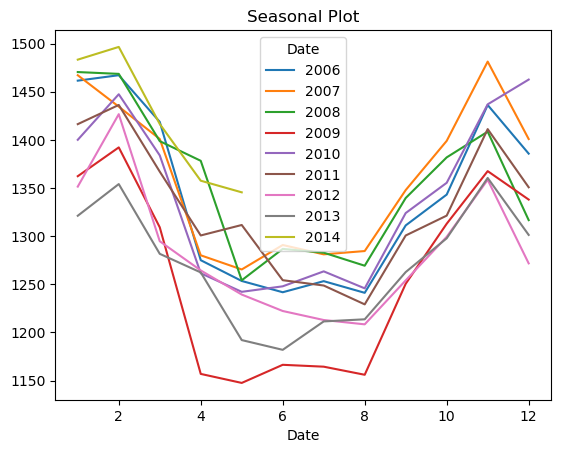

In [33]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


**A lag plot below** is a scatter plot of a series with itself, shifted, or lagged. Put another way, a lag plot measures one value against the next or previous value.

Text(0.5, 1.0, 'Lag plot with lag=1')

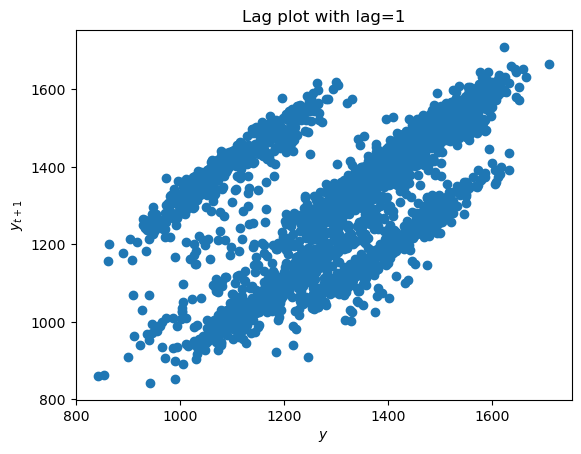

In [34]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')


,this_week,Wind,Solar,Wind+Solar,year,month,the_next_week
Date,,,,,,,
2006-01-01,1069.184000,164.814173,89.258695,272.663481,2006.0,1.000000,1381.300143
2006-01-08,1381.300143,164.814173,89.258695,272.663481,2006.0,1.000000,1486.730286
2006-01-15,1486.730286,164.814173,89.258695,272.663481,2006.0,1.000000,1490.031143
2006-01-22,1490.031143,164.814173,89.258695,272.663481,2006.0,1.000000,1514.176857
2006-01-29,1514.176857,164.814173,89.258695,272.663481,2006.0,1.000000,1501.403286
...,...,...,...,...,...,...,...
2014-05-04,1295.405714,52.989714,110.741857,163.731571,2014.0,4.571429,1372.166000
2014-05-11,1372.166000,204.100143,124.597143,328.697286,2014.0,5.000000,1372.636143
2014-05-18,1372.636143,117.518286,131.462000,248.980286,2014.0,5.000000,1357.924714


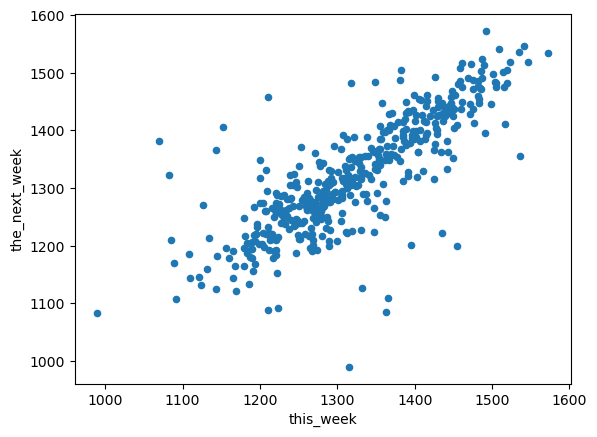

In [38]:
# PLOT  log of week to week
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.Consumption.shift(-1)
weekly = weekly.rename(columns={'Consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

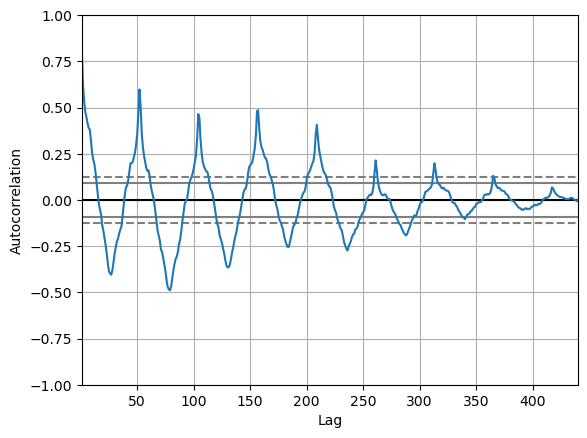

In [40]:
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())

**Seasonal decomposition** is a fancy way to say that we can model time series as having 3 seperate components, the seasonal repeated cycle, the long term trend, and random noise1. There are two types of seasonal decomposition models, additive and multiplicative.



In [41]:
y = train.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
Date,,,,
2006-01-01,1069.184000,NaN,-68.436919,NaN
2006-01-08,1381.300143,NaN,-125.834361,NaN
2006-01-15,1486.730286,NaN,35.842807,NaN
2006-01-22,1490.031143,NaN,106.451745,NaN
2006-01-29,1514.176857,NaN,122.022519,NaN


<Axes: xlabel='Date'>

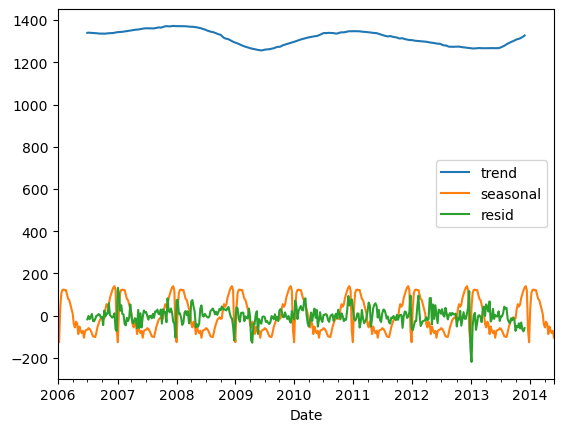

In [42]:
decomposition.iloc[:, 1:].plot()

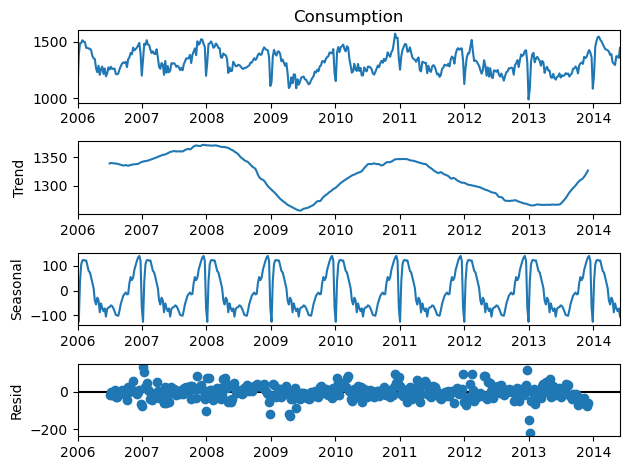

In [45]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None